In [49]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import random
from sklearn import tree
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from graphviz import Source
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
import graphviz
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score





In [35]:
df = pd.read_csv("CKD_proccesed.csv")

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      369 non-null    float64
 1   age     369 non-null    float64
 2   bp      369 non-null    float64
 3   sg      369 non-null    float64
 4   al      369 non-null    float64
 5   su      369 non-null    float64
 6   rbc     369 non-null    float64
 7   pc      369 non-null    float64
 8   pcc     369 non-null    float64
 9   ba      369 non-null    float64
 10  bgr     369 non-null    float64
 11  bu      369 non-null    float64
 12  sc      369 non-null    float64
 13  sod     369 non-null    float64
 14  pot     369 non-null    float64
 15  hemo    369 non-null    float64
 16  pcv     369 non-null    float64
 17  wbcc    369 non-null    float64
 18  rbcc    369 non-null    float64
 19  htn     369 non-null    float64
 20  dm      369 non-null    float64
 21  cad     369 non-null    float64
 22  ap

In [37]:
x = df.iloc[:,1:25]
y = df.iloc[:,25]
x

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
0,48.0,80.0,1.020,1.0,0.0,1.0,1.0,0.0,0.0,121.000000,...,15.4,44.0,7800.0,5.200000,1.0,1.0,0.0,1.0,0.0,0.0
1,7.0,50.0,1.020,4.0,0.0,1.0,1.0,0.0,0.0,147.190476,...,11.3,38.0,6000.0,4.707435,0.0,0.0,0.0,1.0,0.0,0.0
2,62.0,80.0,1.010,2.0,3.0,1.0,1.0,0.0,0.0,423.000000,...,9.6,31.0,7500.0,4.707435,0.0,1.0,0.0,0.0,0.0,1.0
3,48.0,70.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,117.000000,...,11.2,32.0,6700.0,3.900000,1.0,0.0,0.0,0.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,1.0,1.0,0.0,0.0,106.000000,...,11.6,35.0,7300.0,4.600000,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,55.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,140.000000,...,15.7,47.0,6700.0,4.900000,0.0,0.0,0.0,1.0,0.0,0.0
365,42.0,70.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,75.000000,...,16.5,54.0,7800.0,6.200000,0.0,0.0,0.0,1.0,0.0,0.0
366,12.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,100.000000,...,15.8,49.0,6600.0,5.400000,0.0,0.0,0.0,1.0,0.0,0.0
367,17.0,60.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,114.000000,...,14.2,51.0,7200.0,5.900000,0.0,0.0,0.0,1.0,0.0,0.0


In [38]:
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,1.0,48.0,80.0,1.020,1.0,0.0,1.0,1.0,0.0,0.0,...,44.0,7800.0,5.200000,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,2.0,7.0,50.0,1.020,4.0,0.0,1.0,1.0,0.0,0.0,...,38.0,6000.0,4.707435,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,3.0,62.0,80.0,1.010,2.0,3.0,1.0,1.0,0.0,0.0,...,31.0,7500.0,4.707435,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,4.0,48.0,70.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,...,32.0,6700.0,3.900000,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,5.0,51.0,80.0,1.010,2.0,0.0,1.0,1.0,0.0,0.0,...,35.0,7300.0,4.600000,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,396.0,55.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,...,47.0,6700.0,4.900000,0.0,0.0,0.0,1.0,0.0,0.0,0.0
365,397.0,42.0,70.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,...,54.0,7800.0,6.200000,0.0,0.0,0.0,1.0,0.0,0.0,0.0
366,398.0,12.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,...,49.0,6600.0,5.400000,0.0,0.0,0.0,1.0,0.0,0.0,0.0
367,399.0,17.0,60.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,...,51.0,7200.0,5.900000,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [59]:
x1,x2,y1,y2 = train_test_split(x,y,test_size = 0.30,random_state=1)

In [60]:
y1

191    1.0
80     1.0
88     1.0
227    0.0
328    0.0
      ... 
203    1.0
255    0.0
72     1.0
235    0.0
37     1.0
Name: class, Length: 258, dtype: float64

In [61]:
clf = DecisionTreeClassifier(max_depth=8)  
clf = clf.fit(x1,y1) 
y_pred = clf.predict(x2) 
 
# # Model Accuracy, how often is the classifier correct?


|--- feature_14 <= 13.15
|   |--- feature_15 <= 44.50
|   |   |--- feature_10 <= 15.50
|   |   |   |--- feature_9 <= 122.50
|   |   |   |   |--- class: 1.0
|   |   |   |--- feature_9 >  122.50
|   |   |   |   |--- class: 0.0
|   |   |--- feature_10 >  15.50
|   |   |   |--- feature_15 <= 41.50
|   |   |   |   |--- class: 1.0
|   |   |   |--- feature_15 >  41.50
|   |   |   |   |--- feature_16 <= 7653.25
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- feature_16 >  7653.25
|   |   |   |   |   |--- class: 0.0
|   |--- feature_15 >  44.50
|   |   |--- class: 0.0
|--- feature_14 >  13.15
|   |--- feature_2 <= 1.02
|   |   |--- class: 1.0
|   |--- feature_2 >  1.02
|   |   |--- feature_18 <= 0.50
|   |   |   |--- class: 0.0
|   |   |--- feature_18 >  0.50
|   |   |   |--- feature_3 <= 0.50
|   |   |   |   |--- class: 0.0
|   |   |   |--- feature_3 >  0.50
|   |   |   |   |--- class: 1.0



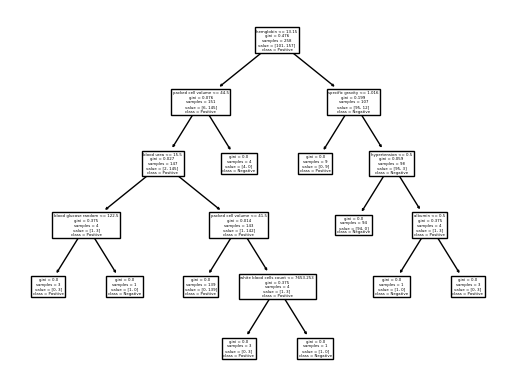

In [62]:
tree.plot_tree(clf,
              feature_names=list,  
                   class_names=['Negative','Positive']
              )
text_representation = tree.export_text(clf)
print(text_representation)

In [63]:
confusion = confusion_matrix(y2, y_pred)
accuracy = metrics.accuracy_score(y2, y_pred)
precision = metrics.precision_score(y2, y_pred)
recall = metrics.recall_score(y2, y_pred)
f1 = metrics.f1_score(y2, y_pred)
auc = roc_auc_score(y2, y_pred)
scores = cross_val_score(clf, x, y, cv=5)

print('Confusion Matrics:\t\t',confusion)
print("Accuracy:\t\t\t",accuracy) 
print("Precision:\t\t\t",precision) 
print("Recall:\t\t\t\t",recall) 
print("F1:\t\t\t\t",f1) 
print("Auc:\t\t\t\t",auc) 
print("Cross-validation scores:\t", scores)



Confusion Matrics:		 [[46  3]
 [ 0 62]]
Accuracy:			 0.972972972972973
Precision:			 0.9538461538461539
Recall:				 1.0
F1:				 0.9763779527559054
Auc:				 0.9693877551020409
Cross-validation scores:	 [0.95945946 0.94594595 0.94594595 0.98648649 0.97260274]


In [28]:
# dot_data = export_graphviz(clf, out_file=None,
#                            feature_names=list,
# #                             class_names=df['class'],
#                            filled=True, rounded=True,
#                            special_characters=True)

# # Use graphviz to create the decision tree graph
# graph = graphviz.Source(dot_data)

# # Display the decision tree graph
# graph.view()

In [29]:
list = [
'age',
'blood pressure',
'specific gravity',
'albumin',
'suger',
'red blood cells',
'pus cells',
'pus cells clumps',
'bacteria',
'blood glucose random',
'blood urea',
'serum creatinine',
'sodium',
'potassium',
'hemglobin',
'packed cell volume',
'white blood cells count',
'red blood cells count',
'hypertension',
'diabetes mellitus',
'coronary artery disease',
'appetite',
'pedal edema',
'anemia']


In [30]:
print(len(list))

24


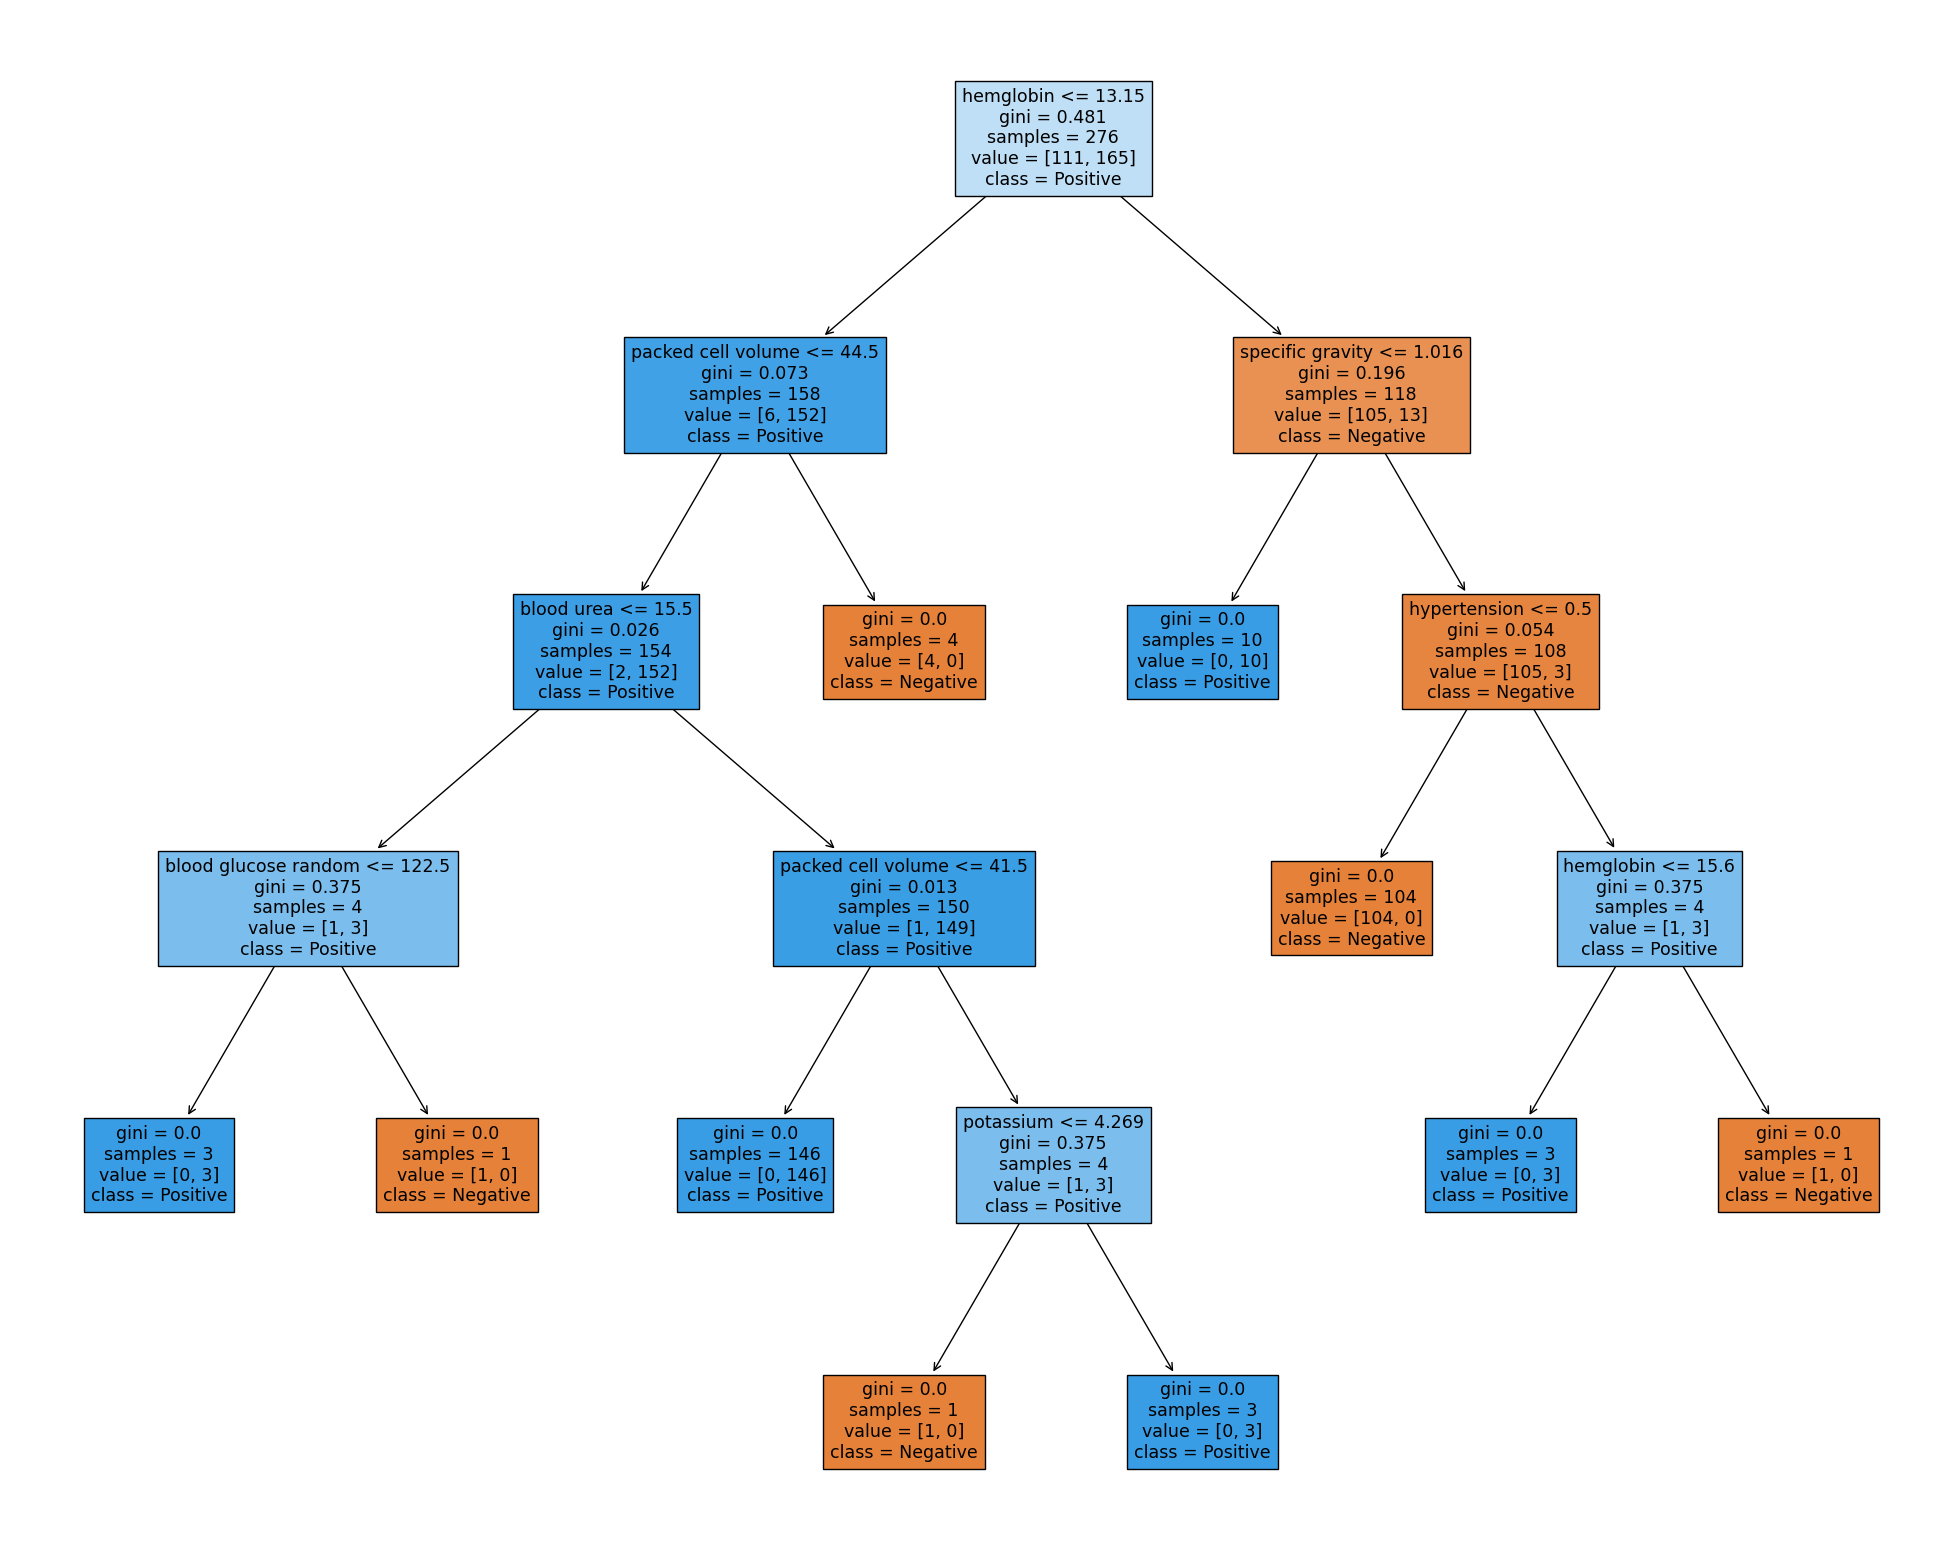

In [31]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=list,  
                   class_names=['Negative','Positive'],
                   filled=True)
fig.savefig('DecisionTree.png', dpi=300)


In [32]:
clf.feature_importances_

array([0.        , 0.        , 0.1303692 , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.01130221,
       0.00347645, 0.        , 0.        , 0.01130221, 0.74999586,
       0.06090324, 0.        , 0.        , 0.03265083, 0.        ,
       0.        , 0.        , 0.        , 0.        ])

Cross-validation scores: [0.95945946 0.94594595 0.94594595 0.97297297 0.97260274]


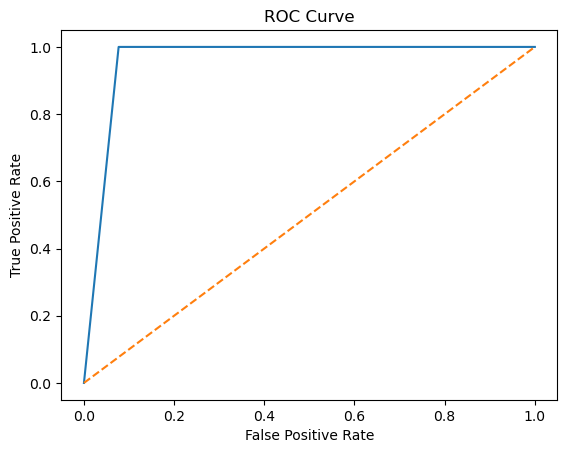

AUC: 0.9615384615384616


In [50]:
fpr, tpr, thresholds = roc_curve(y2, y_pred)
auc = roc_auc_score(y2, y_pred)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

print("AUC:", auc)

In [64]:
clf.feature_importances_

array([0.        , 0.        , 0.12603134, 0.01220281, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.01220281,
       0.00373865, 0.        , 0.        , 0.        , 0.73290817,
       0.06559919, 0.01220281, 0.        , 0.03511422, 0.        ,
       0.        , 0.        , 0.        , 0.        ])